# Chapter 2

In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## 2.1

In [2]:
ways = np.array([0, 3, 8, 9, 0])
ways / ways.sum()

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

## 2.2

Analytical solution for the poster


$$Pr(w \mid n, p) =  \frac{n!}{w!(n − w)!} p^w (1 − p)^{n−w}$$


The probability of observing six W’s in nine tosses—under a value of p=0.5

In [3]:
probabilites = []
for i in range(10):
    probabilites.append(stats.binom.pmf(i, n=9, p=0.5))

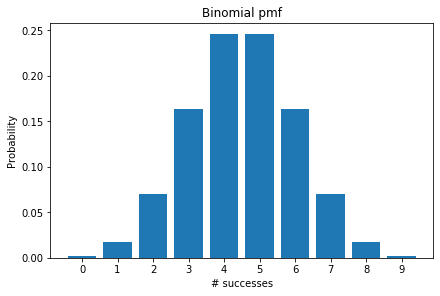

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), constrained_layout=True)

ax.bar(range(10), probabilites)
plt.xticks(range(10))

ax.set_title('Binomial pmf')
ax.set_xlabel('# successes')
ax.set_ylabel('Probability')

plt.show();

In [5]:
sum(probabilites)

0.9999999999999996

## 2.3 and 2.5

Grid approximation to compute the posterior.

In [6]:
def posterior_grid_approx(grid_points=5, k=6, n=9, prior_type='uniform', likelihood='binomial'):
    """Generate an estimate of the posterior distribution."""
    # define grid from 0, 1 with our number of equally spaced values
    p_grid = np.linspace(0, 1, grid_points)

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(k, n, p_grid)
    
    # define prior probability of p 
    if prior_type == 'uniform':
        prior = np.repeat(1, repeats=grid_points)
    elif prior_type == 'truncated':
        prior = (p_grid >= 0.5).astype(int)
    elif prior_type == 'double_exp':
        prior = np.exp(- 5 * abs(p_grid - 0.5))

    # compute unstandardised posterior -  product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return p_grid, posterior

## 2.3

In [7]:
def plot_grid_approx(points, w, n, ax, *args, ** kwargs):
    p_grid, posterior = posterior_grid_approx(points, k=w, n=n, *args, ** kwargs)

    ax.set_title(f'{points} points')
    ax.set_xlabel('probability of water', fontsize=14)
    ax.set_ylabel('posterior probability', fontsize=14)

    ax.plot(p_grid, posterior, 'o-', label=f'success = {w}\ntosses = {n}')

In [8]:
w, n, = 6, 9
points = [3, 5, 10, 20, 1_000, 100_000]

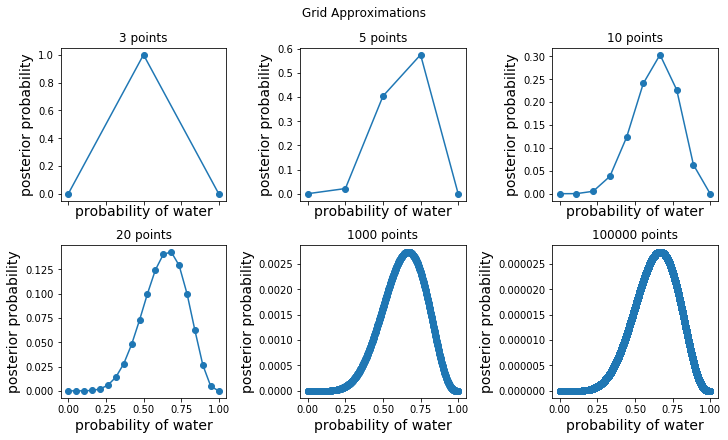

In [9]:
fig, axes, = plt.subplots(nrows=2, ncols=3, figsize=(10, 6),
                          constrained_layout=True, sharex=True)

fig.suptitle('Grid Approximations')

for i, ax in enumerate(axes.flatten()):
    plot_grid_approx(points[i], w, n, ax)
    
plt.show();

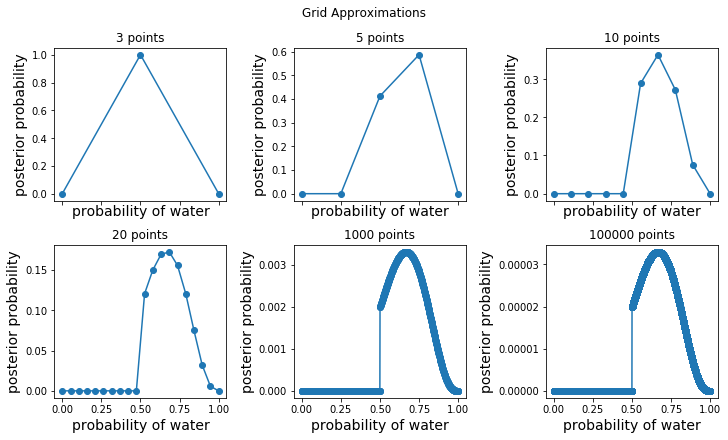

In [10]:
fig, axes, = plt.subplots(nrows=2, ncols=3, figsize=(10, 6),
                          constrained_layout=True, sharex=True)

fig.suptitle('Grid Approximations')

for i, ax in enumerate(axes.flatten()):
    plot_grid_approx(points[i], w, n, ax, prior_type='truncated')
    
plt.show();

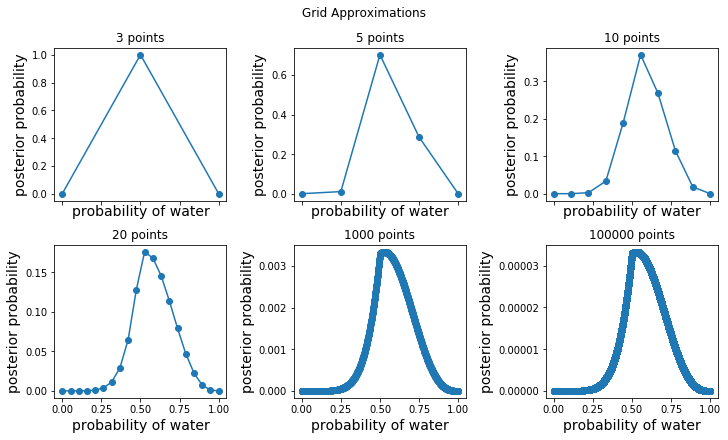

In [11]:
fig, axes, = plt.subplots(nrows=2, ncols=3, figsize=(10, 6),
                          constrained_layout=True, sharex=True)

fig.suptitle('Grid Approximations')

for i, ax in enumerate(axes.flatten()):
    plot_grid_approx(points[i], w, n, ax, prior_type='double_exp')
    
plt.show();

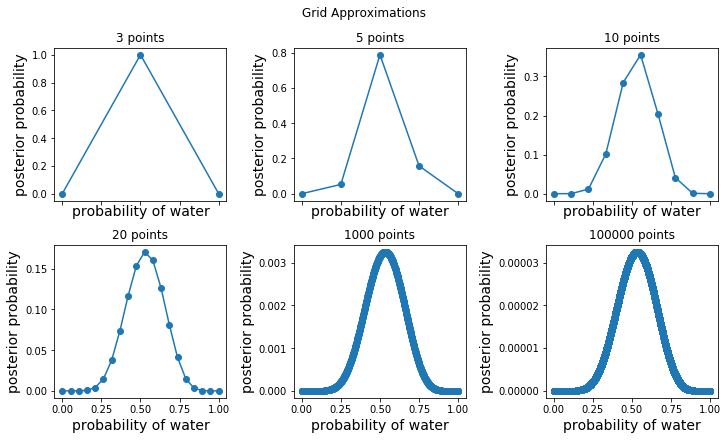

In [12]:
fig, axes, = plt.subplots(nrows=2, ncols=3, figsize=(10, 6),
                          constrained_layout=True, sharex=True)

fig.suptitle('Grid Approximations')

for i, ax in enumerate(axes.flatten()):
    plot_grid_approx(points[i], w=8, n=15, ax=ax)
    
plt.show();

## 2.6

Computing the posterior using the quadratic aproximation

In [13]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_aproximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

/Users/davidloughnane/anaconda3/envs/py37/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1.8075, ||grad|| = 1.5: 100%|██████████| 7/7 [00:00<00:00, 2173.38it/s]
/Users/davidloughnane/anaconda3/envs/py37/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/Users/davidloughnane/anaconda3/envs/

(array(0.66666667), array([0.15713484]))

In [14]:
norm = stats.norm(mean_q, std_q)
prob = .89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
pi = mean_q['p'] + std_q * z 
pi

array([0.41553484, 0.91779849])

## 2.8

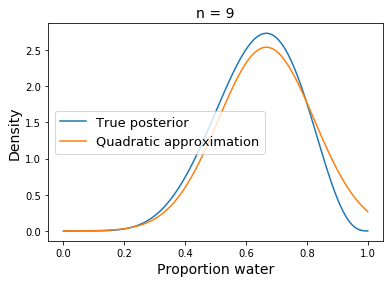

In [15]:
# analytical calculation
w, n = 6, 9
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1),
         label='True posterior')

# quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q['p'], std_q),
         label='Quadratic approximation')
plt.legend(loc=0, fontsize=13)

plt.title('n = {}'.format(n), fontsize=14)
plt.xlabel('Proportion water', fontsize=14)
plt.ylabel('Density', fontsize=14);

### Versions

In [16]:
import sys, IPython, scipy, matplotlib
print(f"This notebook was created using:\nPython {sys.version[:5]}\nIPython {IPython.__version__}\nPyMC3 {pm.__version__}\nNumPy {np.__version__}\nSciPy {scipy.__version__}\nMatplotlib {matplotlib.__version__}\n")

This notebook was created using:
Python 3.7.5
IPython 7.9.0
PyMC3 3.7
NumPy 1.17.3
SciPy 1.3.1
Matplotlib 3.1.1

